# Linear Regression 

## import library

In [45]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

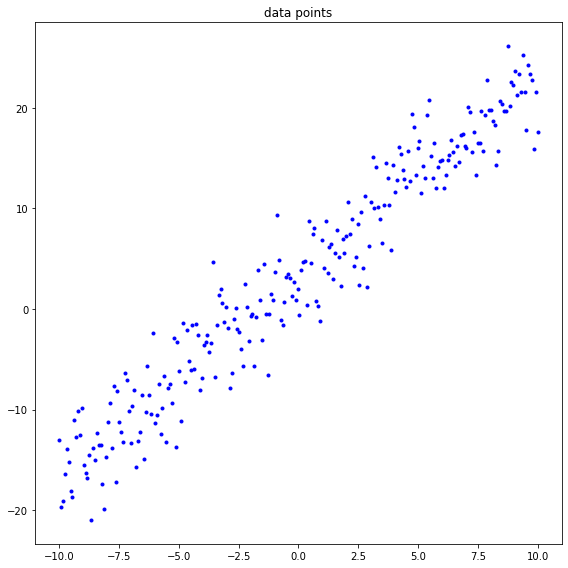

In [46]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

## compute the loss function

In [121]:
def compute_loss(x, y, theta0, theta1):

    sum = 0;
    for i in range(x.shape[0]):
        sum += ((theta0 + (theta1 * x[i]) - y[i]) * (theta0 + (theta1 * x[i]) - y[i]))
        
    
    loss = sum / x.shape[0]
    print(loss)
    return loss

## compute the gradient for each model parameter

In [122]:
def compute_gradient_theta0(x, y, theta0, theta1):
    
    front = (2 / x.shape[0])
    sum = 0
    for i in range(x.shape[0]):
        sum += (theta0 + theta1 * x[i] - y[i]) 
        
    dL = front * sum
    
    return dL

In [123]:
def compute_gradient_theta1(x, y, theta0, theta1):

    front = (2 / x.shape[0])
    sum = 0
    for i in range(x.shape[0]):
        sum += ((theta0 + (theta1 * x[i]) - y[i]) * x[i])

    dL = front * sum

    return dL

## gradient descent for each model parameter

In [142]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

m = 100
theta0min = 0
theta1min = 0
    
for i in range(num_iteration):
    theta0  = theta0 - learning_rate * compute_gradient_theta0(x, y, theta0, theta1)
    theta1  = theta1 - learning_rate * compute_gradient_theta1(x, y, temptheta0, theta1)
    loss    = compute_loss(x, y, theta0, theta1)
    
    if loss < m:
        m = loss
        theta0min = theta0
        theta1min = theta1
    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss
    #print("iteration = %4d, loss = %5.5f" % (i, loss))

33.390655693424364
20.239932612063377
18.48550447681459
17.97133049684899
17.603555201079896
17.263912061607044
16.939179448487025
16.627463490496922
16.328108412132707
16.040609617181683
15.764495970687133
15.499316445712703
15.244638032200736
15.000044884108611
14.76513762470726
14.539532692781062
14.322861716159453
14.11477091021206
13.914920500180214
13.722984166385615
13.538648511409292
13.361612548370031
13.191587209467128
13.028294873984754
12.871468914987505
12.720853263966537
12.57620199272601
12.437278911826596
12.303857184930807
12.175718958420093
12.052655005679203
11.934464385466852
11.820954113814903
11.711938848920376
11.607240588515673
11.506688379223
11.41011803741831
11.31737188114909
11.228298472668117
11.142752371162997
11.060593895277485
10.98168889503705
10.905908532806132
10.833129072919546
10.763231679644475
10.696102223143097
10.63163109311918
10.569713019844194
10.510246902270907
10.453135642953526
10.398285989505103
10.345608382333243
10.295016808405398
10.24

In [143]:
f = np.zeros(x.shape[0])
for i in range(x.shape[0]):
    f[i] = theta0min + theta1min * x[i]

## plot the results

In [144]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '.', color = 'blue')
    plt.plot(x, f, '-', color = 'red')
    plt.title('linear regression result')

    
    plt.tight_layout()
    plt.show()

In [145]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.plot(loss_iteration, '-', color = 'red')
    plt.title('loss curve')

    
    plt.tight_layout()
    plt.show()

In [146]:

def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.plot(theta0_iteration, '-', color = 'blue')
    plt.plot(theta1_iteration, '-', color = 'green')
    plt.title('model parameter')


    plt.tight_layout()
    plt.show()

In [147]:

X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)

grid_theta0, grid_theta1 = np.meshgrid(X0,X1)
sum = np.arange(-10, 10, 0.1)
R = (1 / x.shape[0])
for i in range(len(X0)):
    for j in range(x.shape[0]):
        sum[i] += pow(X0[i] + X1[i] * x[j] - y[j], 2)
    sum[i] = R * sum[i]

grid_loss = sum
grid_loss = np.asmatrix(grid_loss)
grid_loss = grid_loss.T

def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):
    fig = plt.figure(figsize=(8,6))
    ax3d = plt.axes(projection="3d")

    ax3d = plt.axes(projection='3d')
    ax3d.plot_surface(grid_theta0, grid_theta1, grid_loss ,cmap='coolwarm')
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

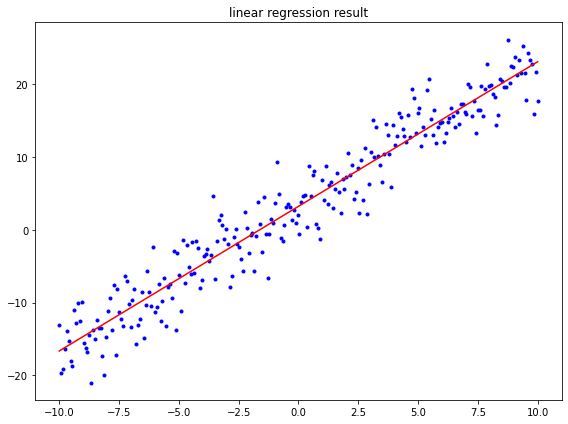

In [148]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue and $\theta_1$ in green over the gradient descent iterations

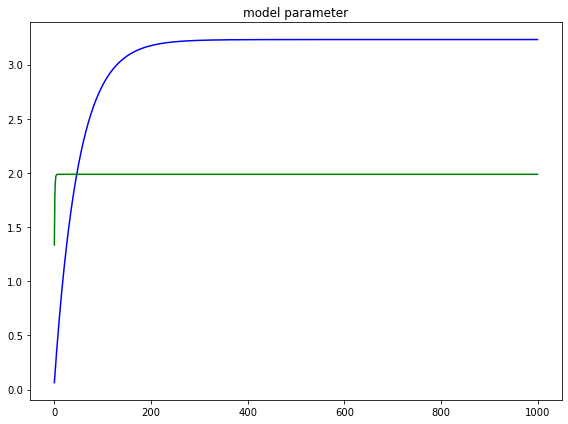

In [149]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red over the gradient descent iterations

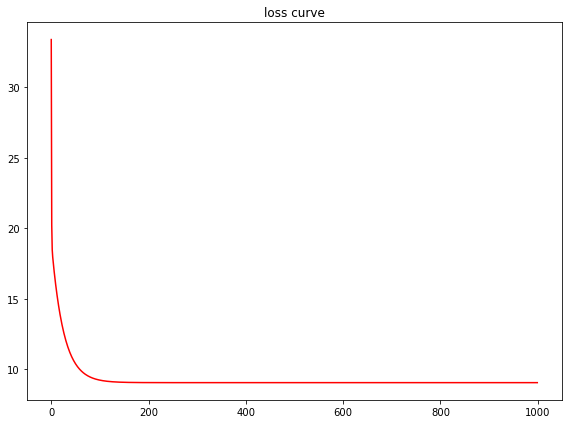

In [150]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

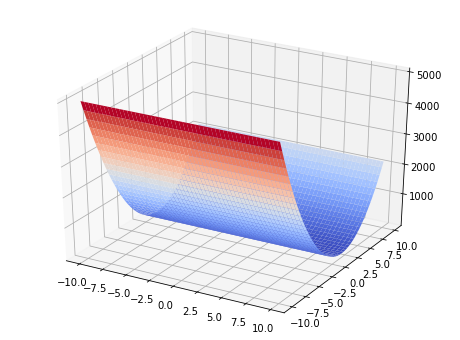

In [72]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)